# Comparing the Different Regression and Rule-Based Learning Models

## 1 - Linear Regression Variants

## A - Using the original dataset with no derived features

## A1 - Import and Data Preparation

In [60]:
# importing libraries
import seaborn as sns #for grouped bar chart
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#loading dataset
df = pd.read_csv("public_cases.csv")

#selecting input and output columns
x = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df['expected_output']

#splitting data into training (750) and test sets(250)
#usx the same random seed value 42, the random number generator produces the same sequence of numbers, resulting in the same random processes, ie training and test data are always same.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# global storage list for all model results in this section
all_regression_results = []

## A2 - Evaluation Function

This helper function calculates all the metrics from the challenge eval.sh script: Exact Matches, Close Matches, MAE, and the final Score.

In [102]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculates and prints the full suite of evaluation metrics
    in the challenge-specified format.
    """
    # Ensure inputs are numpy arrays for comparison
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate metrics
    diffs = np.abs(y_pred - y_true)
    total_cases = len(y_true)
    
    exact_matches = int(np.sum(diffs < 0.01))  # Count the number of predictions that are within 0.01 of the true values.
    close_matches = int(np.sum(diffs < 1.00))  # Count the number of predictions that are within 1.00 of the true values.
    mae = np.mean(diffs)  # Calculate the Mean Absolute Error (MAE) by averaging the differences between predicted and true values.
    rmse = np.sqrt(np.mean((y_pred - y_true)**2))  # Calculate the Root Mean Squared Error (RMSE) by taking the square root of the average of the squared differences.
    
    # Calculate score
    score = (mae * 100) + (total_cases - exact_matches) * 0.1
    
    # Print the report
    print("\n--- Model Report ---")
    print(f"[{model_name}] Total={total_cases} | Exact={exact_matches} | Close(< $1.00)={close_matches} | MAE=${mae:.2f} | RMSE=${rmse:.2f} | Score={score:.2f}")

    #return these so they can be used in the global results matrix
    return mae, rmse, score, exact_matches, close_matches

print("Evaluation helper function `evaluate_model` defined.")

Evaluation helper function `evaluate_model` defined.


## A3 - Linear Regression Models Generation

### I - Simple Linear Regression

In [107]:
#creating the model and storx in object/var lr
lr = LinearRegression()

# fitting or training the model. .fit() finds the best straight-line equation, telling the model how to make future predictions
lr.fit(x_train, y_train)

# predicting on the test data. model uses what it learned from the training data to make predictions on new, unseen data x_test. those predictions are stored in the variable y_pred_lr.
y_pred_lr = lr.predict(x_test)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y_test, y_pred_lr, "Simple Linear Regression")
all_regression_results.append(["Simple Linear Regression", mae, rmse, score, exact_matches, close_matches ])


--- Model Report ---
[Simple Linear Regression] Total=250 | Exact=0 | Close(< $1.00)=1 | MAE=$161.33 | RMSE=$201.37 | Score=16157.98


### II - Polynomial Regression

In [108]:
# Step 1: Create polynomial features (degree=2 means squared + interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Step 2: Create and fit model
poly_lr = LinearRegression()
poly_lr.fit(x_poly_train, y_train)

# Step 3: Predict
y_pred_poly = poly_lr.predict(x_poly_test)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
all_regression_results.append(["Polynomial Regression", mae, rmse, score, exact_matches, close_matches ])


--- Model Report ---
[Polynomial Regression] Total=250 | Exact=0 | Close(< $1.00)=1 | MAE=$102.30 | RMSE=$140.15 | Score=10255.21


### III - Ridge Regression

In [109]:
# Scale features to make regularization fair
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
all_regression_results.append(["Ridge Regression", mae, rmse, score, exact_matches, close_matches ])


--- Model Report ---
[Ridge Regression] Total=250 | Exact=0 | Close(< $1.00)=1 | MAE=$161.31 | RMSE=$201.31 | Score=16156.09


### IV - Lasso Regression

In [110]:
# Scale features to make regularization fair
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
all_regression_results.append(["Lasso Regression", mae, rmse, score, exact_matches, close_matches ])


--- Model Report ---
[Lasso Regression] Total=250 | Exact=0 | Close(< $1.00)=1 | MAE=$161.32 | RMSE=$201.35 | Score=16157.28


## A3 - Regression Model Output Comparisons Using the Original Dataset

In [146]:
df_results = pd.DataFrame(
    all_regression_results,
    columns=["Model", "MAE ($)", "RMSE ($)", "Score", "Exact Matches", "Close Matches"]
)

#remove any duplicates of any model
df_results = df_results.drop_duplicates(subset="Model", keep="last")

df_results.style.set_caption("Table: Regression Model Evaluation Summary (Using Original Dataset)")

,Model,MAE ($),RMSE ($),Score,Exact Matches,Close Matches
17,Simple Linear Regression,161.329819,201.365895,16157.981931,0.000000,1.000000
18,Polynomial Regression,102.302091,140.148693,10255.209136,0.000000,1.000000
19,Ridge Regression,161.310949,201.314646,16156.094887,0.000000,1.000000
20,Lasso Regression,161.322777,201.346439,16157.277749,0.000000,1.000000


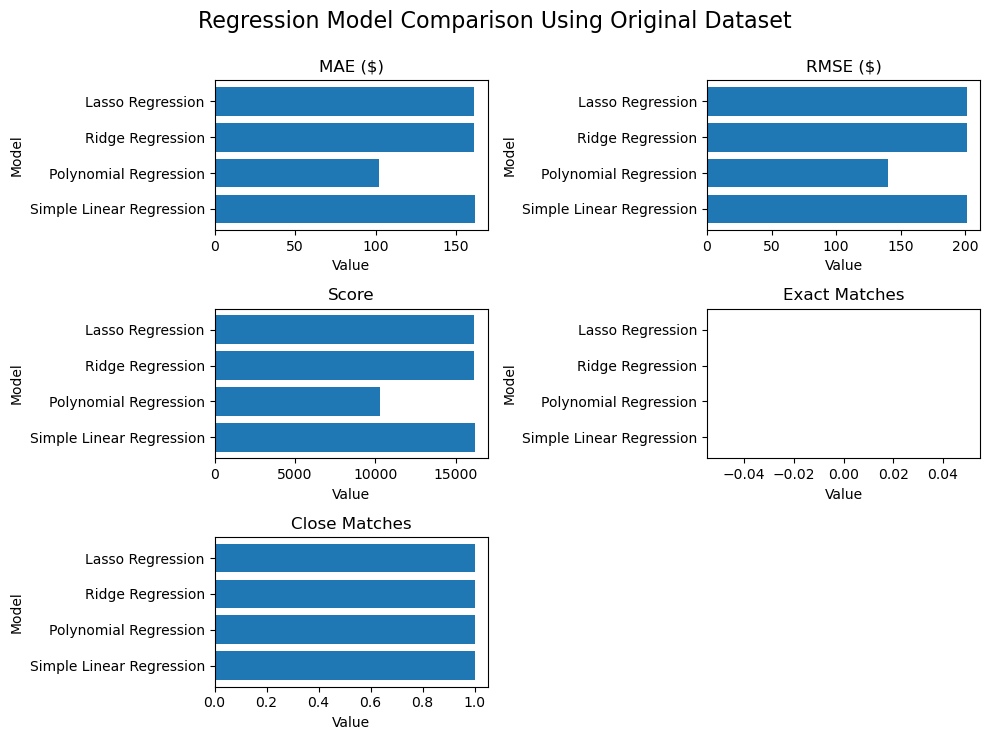

In [127]:
#import matplotlib.pyplot as plt

# Ensure df_results exists with the 5 columns:

metrics = ["MAE ($)", "RMSE ($)", "Score", "Exact Matches", "Close Matches"]

plt.figure(figsize=(10, 7))

for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1) #3rows, 2 columns, horizontal bars (barh)
    plt.barh(df_results["Model"], df_results[metric])
    plt.title(metric)
    plt.xlabel("Value")
    plt.ylabel("Model")
    plt.tight_layout()

plt.suptitle("Regression Model Comparison Using Original Dataset", fontsize=16, y=1.05)
plt.show()


## B - Using the dataset with derived features

## B1 - Import and Data Preparation

In [87]:
# importing libraries
import pandas as pd #for manipulatx tabular data ie csv
import numpy as np # for math funcs
from sklearn.model_selection import train_test_split #function randomly splits dataset into a training set and a test set.
from sklearn.linear_model import LinearRegression, Ridge, Lasso #models
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score #evaluation funcs

#loading dataset
#df = pd.read_csv("public_cases_derived_features.csv")

# Load the pre-engineered dataset
try:
    df = pd.read_csv("public_cases_derived_features.csv")
    print(f"Successfully loaded {len(df)} records with {len(df.columns)-1} features.")
except FileNotFoundError:
    print("Error: 'public_cases_derived_features.csv' not found.")
    # Handle error or stop execution

#selecting input and output columns
x2 = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'miles_per_day', 'receipts_per_day', 'log_receipts', 'sqrt_miles', 'is_5day', 'is_long_trip', 'is_sweet_spot', 'is_receipts_over_800', 'is_receipts_under_50', 'is_rpd_under_20', 'is_efficient_miles', 'is_modest_short', 'is_modest_med', 'is_modest_long', 'is_vacation_penalty', 'is_miles_tier1', 'is_miles_tier2', 'is_cents_49', 'is_cents_99', 'days_x_miles', 'days_x_receipts', 'miles_x_receipts', 'miles_sq', 'receipts_sq']]
y2 = df['expected_output']

# OR USE THIS
# Define our target variable
#TARGET = 'expected_output'

# Define our feature list (all columns except the target)
#FEATURES = [col for col in df.columns if col != TARGET]

# Create our main X and y data
#X = df[FEATURES]
#y = df[TARGET]


#splitting data into training (750) and test sets(250)
#usx the same random seed value 42, the random number generator produces the same sequence of numbers, resulting in the same random processes, ie training and test data are always same.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25, random_state=42)

# global storage list for all model results in this section
all_regression_results2 = []

Successfully loaded 1000 records with 27 features.


## B2 - Linear Regression Models Generation

### I - Simple Linear Regression

In [128]:
#creating the model and storx in object/var lr
lr = LinearRegression()

# fitting or training the model. .fit() finds the best straight-line equation, telling the model how to make future predictions
lr.fit(x2_train, y2_train)

# predicting on the test data. model uses what it learned from the training data to make predictions on new, unseen data x_test. those predictions are stored in the variable y_pred_lr.
y2_pred_lr = lr.predict(x2_test)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y2_test, y2_pred_lr, "Simple Linear Regression")
all_regression_results2.append(["Simple Linear Regression", mae, rmse, score, exact_matches, close_matches])


--- Model Report ---
[Simple Linear Regression] Total=250 | Exact=0 | Close(< $1.00)=1 | MAE=$77.41 | RMSE=$105.10 | Score=7765.53


### II - Polynomial Regression

In [129]:
# Step 1: Create polynomial features (degree=2 means squared + interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
x2_poly_train = poly.fit_transform(x2_train)
x2_poly_test = poly.transform(x2_test)

# Step 2: Create and fit model
poly_lr2 = LinearRegression()
poly_lr2.fit(x2_poly_train, y2_train)

# Step 3: Predict
y2_pred_poly = poly_lr2.predict(x2_poly_test)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y2_test, y2_pred_poly, "Polynomial Regression")
all_regression_results2.append(["Polynomial Regression", mae, rmse, score, exact_matches, close_matches])


--- Model Report ---
[Polynomial Regression] Total=250 | Exact=0 | Close(< $1.00)=4 | MAE=$68.81 | RMSE=$96.08 | Score=6906.28


## III - Ridge Regression

In [130]:
# Scale features to make regularization fair
scaler = StandardScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

# Ridge Regression
ridge2 = Ridge(alpha=1.0)
ridge2.fit(x2_train_scaled, y2_train)
y2_pred_ridge = ridge2.predict(x2_test_scaled)

##Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y2_test, y2_pred_ridge, "Ridge Regression")
all_regression_results2.append(["Ridge Regression", mae, rmse, score, exact_matches, close_matches])


--- Model Report ---
[Ridge Regression] Total=250 | Exact=0 | Close(< $1.00)=2 | MAE=$77.83 | RMSE=$105.52 | Score=7808.30


### IV - Lasso Regression

In [132]:
# Scale features to make regularization fair
scaler = StandardScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

# Lasso Regression
lasso2 = Lasso(alpha=0.1, max_iter=5000) #increased the number of iterations to ensure  that the optimization algorithm has enough time to converge to an optimal solution 
lasso2.fit(x2_train_scaled, y2_train)
y2_pred_lasso = lasso2.predict(x2_test_scaled)

#Evaluating using func defined above, and storing results in the global list of results
mae, rmse, score, exact_matches, close_matches = evaluate_model(y2_test, y2_pred_lasso, "Lasso Regression")
all_regression_results2.append(["Lasso Regression", mae, rmse, score, exact_matches, close_matches])


--- Model Report ---
[Lasso Regression] Total=250 | Exact=0 | Close(< $1.00)=1 | MAE=$77.29 | RMSE=$104.96 | Score=7754.19


## B3 - Regression Model Output Comparisons Using the Dataset with Derived Features

In [135]:
df_results2 = pd.DataFrame(
    all_regression_results2,
    columns=["Model", "MAE ($)", "RMSE ($)", "Score", "Exact Matches", "Close Matches"]
)

#remove any duplicates of any model
df_results2 = df_results2.drop_duplicates(subset="Model", keep="last")

df_results2.style.set_caption("Table: Regression Model Evaluation Summary (Using Dataset with Derived Features)")

,Model,MAE ($),RMSE ($),Score,Exact Matches,Close Matches
5,Simple Linear Regression,77.405307,105.100270,7765.530724,0.000000,1.000000
6,Polynomial Regression,68.812792,96.083217,6906.279160,0.000000,4.000000
7,Ridge Regression,77.833025,105.517233,7808.302525,0.000000,2.000000
9,Lasso Regression,77.291878,104.963447,7754.187804,0.000000,1.000000


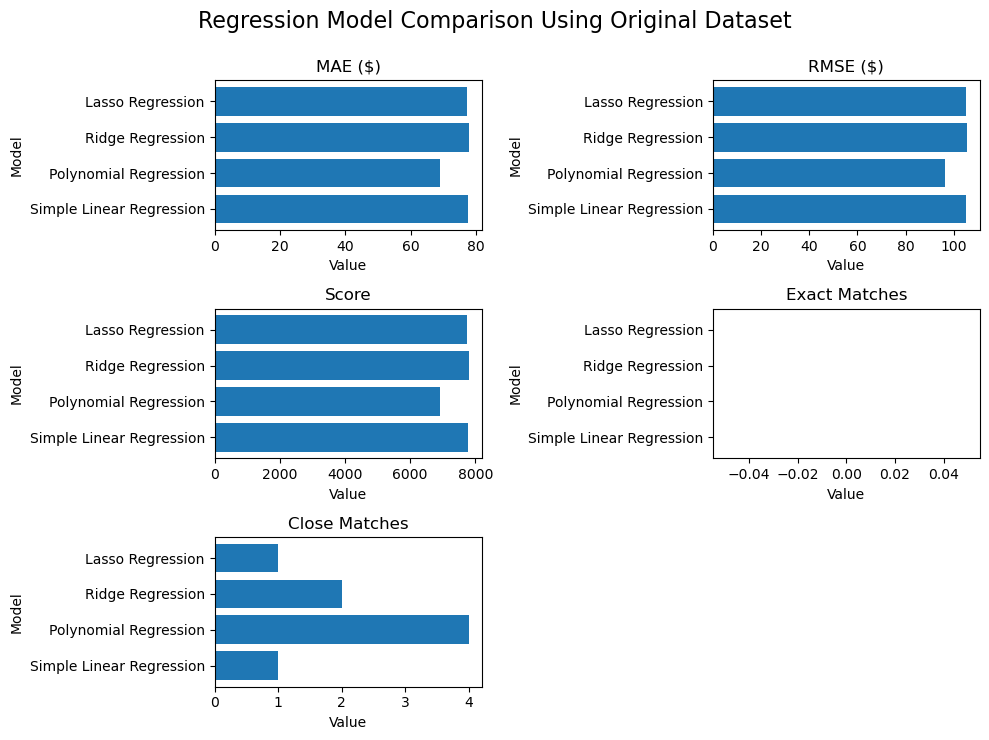

In [136]:
#import matplotlib.pyplot as plt

# Ensure df_results exists with the 5 columns:

metrics = ["MAE ($)", "RMSE ($)", "Score", "Exact Matches", "Close Matches"]

plt.figure(figsize=(10, 7))

for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1) #3rows, 2 columns, horizontal bars (barh)
    plt.barh(df_results2["Model"], df_results2[metric])
    plt.title(metric)
    plt.xlabel("Value")
    plt.ylabel("Model")
    plt.tight_layout()

plt.suptitle("Regression Model Comparison Using Original Dataset", fontsize=16, y=1.05)
plt.show()


# Conclusion - Regression Model Comparison

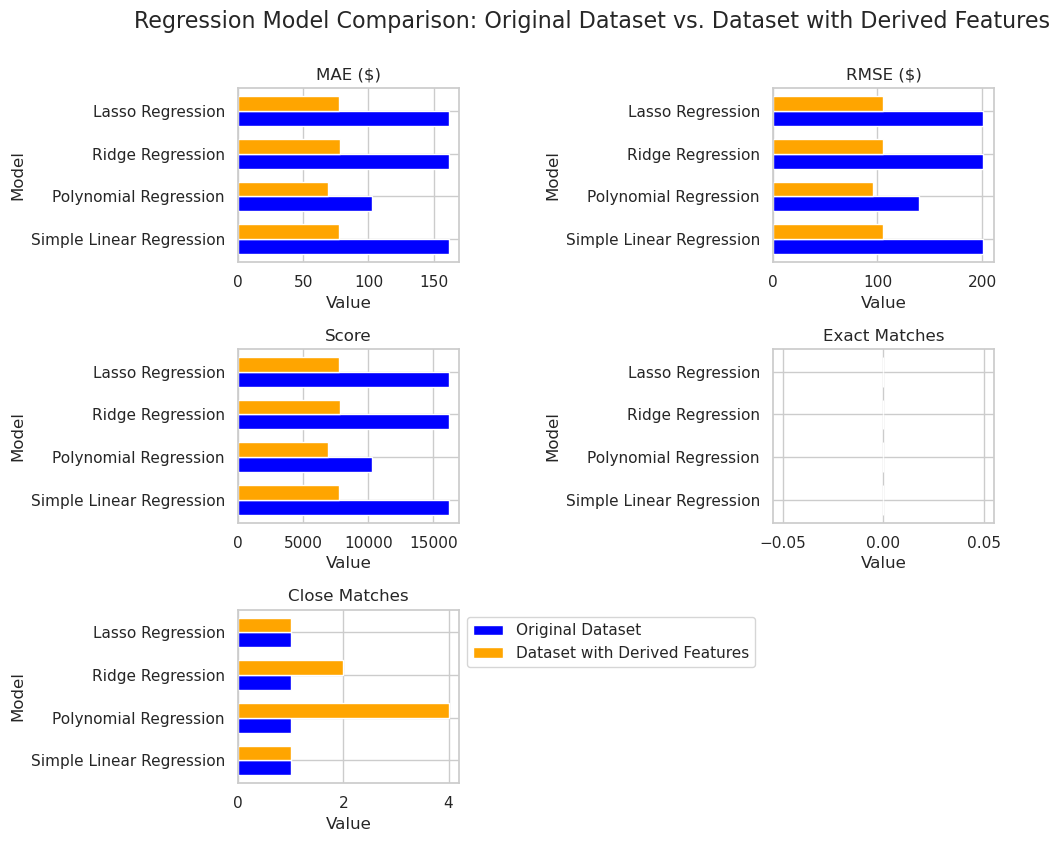

In [150]:

# Define metrics and specify the width and positions of the bars
metrics = ["MAE ($)", "RMSE ($)", "Score", "Exact Matches", "Close Matches"]
bar_width = 0.35  # Width of each bar
index = np.arange(len(df_results["Model"]))  # X locations for the models

plt.figure(figsize=(12, 8))

# Loop through each metric to create subplots
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns
    # Bars for the first DataFrame (table 1)
    bars1 = plt.barh(index - bar_width/2, df_results[metric], bar_width, label='Original Dataset', color='blue')
    # Bars for the second DataFrame (table 2)
    bars2 = plt.barh(index + bar_width/2, df_results2[metric], bar_width, label='Dataset with Derived Features', color='orange')
    
    plt.title(metric)
    plt.xlabel("Value")
    plt.ylabel("Model")
    plt.yticks(index, df_results["Model"])  # Set model names on y-axis
   # plt.legend()  # Show legend for clarity
    plt.tight_layout()
    #plt.legend(title='Data Source', loc='lower right')

# Add a single legend outside of the plotting area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend


plt.suptitle("Regression Model Comparison: Original Dataset vs. Dataset with Derived Features", fontsize=16, y=1.05)
plt.show()

The comparison between Table 1 (original dataset) and Table 2 (dataset with derived features) shows that incorporating the derived features consistently improved the model performance across all regression types.

Among all models, the Polynomial Regression (Degree 2) model achieved the best results. It has the least MAE=$68.81, RMSE=$96.08, Score=6906, and 4 Close Matches, when using the derived features dataset, suggesting that it captures the non-linear relationships between trip characteristics and reimbursement amounts more effectively than the linear, Ridge, or Lasso models.

## 2 - Rule-Based Learning Models (Using Derived Features)

## A1 - Import and Data Preparation

In [14]:
pip install gplearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
# importing libraries
import pandas as pd #for manipulatx tabular data ie csv
import numpy as np # for math funcs
from sklearn.model_selection import train_test_split #function randomly splits dataset into a training set and a test set.
from sklearn.linear_model import LinearRegression, Ridge, Lasso #models
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score #evaluation funcs

#Imports the SymbolicRegressor class from the gplearn package. This is the algorithm that will search for symbolic mathematical expressions that predict y from X
from gplearn.genetic import SymbolicRegressor

#loading dataset
df = pd.read_csv("public_cases_derived_features.csv")

#selecting input and output columns
x = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'miles_per_day', 'receipts_per_day', 'log_receipts', 'sqrt_miles', 'is_5day', 'is_long_trip', 'is_sweet_spot', 'is_receipts_over_800', 'is_receipts_under_50', 'is_rpd_under_20', 'is_efficient_miles', 'is_modest_short', 'is_modest_med', 'is_modest_long', 'is_vacation_penalty', 'is_miles_tier1', 'is_miles_tier2', 'is_cents_49', 'is_cents_99', 'days_x_miles', 'days_x_receipts', 'miles_x_receipts', 'miles_sq', 'receipts_sq']]
y = df['expected_output']

#splitting data into training (750) and test sets(250)
#usx the same random seed value 42, the random number generator produces the same sequence of numbers, resulting in the same random processes, ie training and test data are always same.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## A2 - Rule-Based Learning Model Generation

### I - Symbolic Regression

In [7]:
# 1-dataset already loaded above
# 2-x and y values already assigned above
# 3-data has also been splitted into training and test datasets above

# 4 - creating the symbolic regression model
model = SymbolicRegressor(
    population_size=2000,
    generations=30,
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.001,
    random_state=42
)

# --------------------------------------------
# Fit / Train the model
# --------------------------------------------
model.fit(x_train, y_train)

# --------------------------------------------
# Predict on the test data
# --------------------------------------------
y_pred = model.predict(x_test)

# --------------------------------------------
# Evaluation metrics
# --------------------------------------------
print("\n=== Symbolic Regression Results ===")
print("Model formula:")
print(model._program)        # shows the discovered equation

print("\nR2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

import joblib
joblib.dump(model, "symbolic_model.joblib")
model = joblib.load("symbolic_model.joblib")


/home/ambe/anaconda3/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.62      1.37787e+31        5          409.093          413.195      1.41m
   1     9.66       7.8336e+07       11          393.442          395.639     45.85s
   2     8.39      1.72912e+13       11          386.332          459.628     39.54s
   3     8.79      1.10578e+12        7          363.768          455.559     26.56s
   4    10.82      1.26513e+09        7          354.223          395.611     25.45s
   5    10.14      1.19405e+11       15          342.925          352.997     23.99s
   6    10.04      1.98908e+14       15          340.524          374.614     22.96s
   7     9.81      2.45329e+09       17          334.193          316.216     22.25s
   8    12.24      2.72942e+08       15          326.704          396.852  

In [8]:
# quick_experiments_symbolic.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.genetic import SymbolicRegressor

# --- Load data ---
df = pd.read_csv("public_cases_derived_features.csv")
X = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount',
        'miles_per_day', 'receipts_per_day', 'log_receipts', 'sqrt_miles',
        'is_5day', 'is_long_trip', 'is_sweet_spot', 'is_receipts_over_800',
        'is_receipts_under_50', 'is_rpd_under_20', 'is_efficient_miles',
        'is_modest_short', 'is_modest_med', 'is_modest_long',
        'is_vacation_penalty', 'is_miles_tier1', 'is_miles_tier2',
        'is_cents_49', 'is_cents_99', 'days_x_miles', 'days_x_receipts',
        'miles_x_receipts', 'miles_sq', 'receipts_sq']].copy()

y = df['expected_output'].copy()

# --- Basic diagnostics ---
print("Dataset shape:", X.shape)
print("Target stats:", y.describe())
print("Missing values per column:\n", X.isna().sum())
# If there are NaNs, drop for now (or implement imputation)
dropna = X.isna().any().any() or y.isna().any()
if dropna:
    print("Dropping rows with missing values")
    df2 = pd.concat([X,y], axis=1).dropna()
    X = df2[X.columns]
    y = df2[y.name]

# --- Baseline linear model ---
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_full)
X_test_s = scaler.transform(X_test_full)

lr = Ridge(alpha=1.0, random_state=42)
lr.fit(X_train_s, y_train_full)
y_pred_lr = lr.predict(X_test_s)
print("\nLinear Ridge baseline R2:", r2_score(y_test_full, y_pred_lr),
      "RMSE:", np.sqrt(mean_squared_error(y_test_full, y_pred_lr)))

# --- Quick feature selection: top 8 features by f_regression ---
k = min(8, X.shape[1])
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_train_s, y_train_full)
top_idx = selector.get_support(indices=True)
top_features = [X.columns[i] for i in top_idx]
print("Top features selected:", top_features)

# Use only top features for symbolic search
X_sel = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.25, random_state=42)
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

# --- Grid of symbolic regressor experiments ---
config_grid = [
    {"function_set": ['add','sub','mul','div'], "parsimony_coefficient": 0.001, "generations": 20},
    {"function_set": ['add','sub','mul','div'], "parsimony_coefficient": 0.01,  "generations": 30},
    {"function_set": ['add','sub','mul','div','sin','cos'], "parsimony_coefficient": 0.01, "generations": 30},
]

best = {"r2": -999, "config": None, "model": None}
for cfg in config_grid:
    print("\n--- Testing config:", cfg)
    model = SymbolicRegressor(
        population_size=1000,
        generations=cfg["generations"],
        stopping_criteria=0.0,
        p_crossover=0.7,
        p_subtree_mutation=0.1,
        p_hoist_mutation=0.05,
        p_point_mutation=0.1,
        max_samples=0.9,
        verbose=1,
        parsimony_coefficient=cfg["parsimony_coefficient"],
        random_state=42,
        function_set=cfg["function_set"],
        const_range=(-10, 10)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Result R2:", r2, "RMSE:", rmse)
    if r2 > best["r2"]:
        best.update(r2=r2, config=cfg, model=model)

# --- Report best ---
print("\n=== Best symbolic config ===")
print(best["config"])
print("R2 on held-out test:", best["r2"])
print("Best formula:")
print(best["model"]._program)


Dataset shape: (1000, 27)
Target stats: count    1000.000000
mean     1349.114030
std       470.316464
min       117.240000
25%      1019.297500
50%      1454.260000
75%      1711.122500
max      2337.730000
Name: expected_output, dtype: float64
Missing values per column:
 trip_duration_days       0
miles_traveled           0
total_receipts_amount    0
miles_per_day            0
receipts_per_day         0
log_receipts             0
sqrt_miles               0
is_5day                  0
is_long_trip             0
is_sweet_spot            0
is_receipts_over_800     0
is_receipts_under_50     0
is_rpd_under_20          0
is_efficient_miles       0
is_modest_short          0
is_modest_med            0
is_modest_long           0
is_vacation_penalty      0
is_miles_tier1           0
is_miles_tier2           0
is_cents_49              0
is_cents_99              0
days_x_miles             0
days_x_receipts          0
miles_x_receipts         0
miles_sq                 0
receipts_sq             

/home/ambe/anaconda3/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0    24.89          75168.5       31          1306.15           1369.4     21.02s
   1    17.95          1341.98       11          1221.15          1212.13     18.42s
   2    40.17          1384.25      125          1088.77           1033.6     18.11s
   3    69.14          1445.83       15          949.085          964.769     20.95s
   4    89.17          2593.61      125          532.883          404.288     21.43s
   5    94.23          3407.28      117          402.896          450.492     15.12s
   6    72.62          10376.7      117           333.28          405.553     11.68s
   7   104.23          2865.04      113          308.821          363.305     12.18s
   8   100.58          2527.52      115          262.558          275.141     10.65s
   9   110.67          1690.88      117          239.381          225.464      9.85s
  10   110.82          1775.22      113          226.037          336.219      8.98s
  11   117.59          1874.54      121          204.673         

/home/ambe/anaconda3/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0    24.89          75168.5       31          1306.15           1369.4     18.05s
   1    16.74           1341.9       11          1221.15          1212.13     15.47s
   2    38.53          1384.43      125          1088.77           1033.6     17.67s
   3    67.05          1457.96       19          869.653          686.864     20.22s
   4    82.46          2572.64      125          532.883          404.288     21.61s
   5    82.63          4045.92      145          483.429          519.601     20.22s
   6    55.42          17223.9      129          382.677          348.401     16.88s
   7   136.90          3728.17      123          340.185          382.701     23.96s
   8   129.23          1771.94      139          282.263          270.962     22.71s
   9   132.21          1705.43      137          263.107          275.258     21.84s
  10   120.65          1255.68      113          197.129          217.597     20.24s
  11   155.97          1186.63       51          191.613         

/home/ambe/anaconda3/lib/python3.13/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


   0    13.62           1342.1       51          1282.93           1439.7     16.54s
   1    14.12          1338.85       51          1291.23          1365.06     16.19s
   2    23.96          2154.75       31          1018.11           1188.2     17.65s
   3    32.42          3286.67       30          956.527          952.477     17.99s
   4    32.94          4796.07       21          362.482          393.066     18.40s
   5    33.31          8602.84       26           335.77          338.801     18.13s
   6    30.25          15948.2       22          291.529          270.624     15.78s
   7    26.15          38700.2       31          272.303          278.119     13.66s
   8    23.72          35748.6       19          236.557          247.675     12.96s
   9    22.24          32655.4       17          233.067          260.053     12.01s
  10    22.96          40522.3       26          218.064           205.37     11.49s
  11    22.37          33254.6       19          209.889         

In evaluating symbolic regression on a dataset of 1,000 records and 27 engineered features, the analysis found that while the target variable exhibited significant variability, conventional methods like Ridge linear regression produced superior results, achieving an R² of 0.9467 and an RMSE of 105.5. This strong performance indicated that the underlying relationships in the data were primarily linear and effectively captured by standard regression techniques. In contrast, symbolic regression, tested across various configurations, yielded R² values between 0.84 and 0.89, which fell short compared to the Ridge model. The symbolic expressions generated were complex and highly nonlinear, often ignoring many predictive features in favor of a small subset.

The underperformance of symbolic regression can be attributed to several factors. Primarily, the linear nature of the relationships in the dataset made the nonlinear search of symbolic regression unnecessary. Additionally, the large number of input features increased the complexity of the search space, leading to overly intricate formulas that did not generalize well. The best symbolic models often featured complicated mathematical expressions that, while fitting the training data, failed to reflect meaningful patterns. Consequently, linear Ridge regression leveraged the engineered features more effectively, resulting in higher accuracy and better interpretability. Overall, the findings suggest that for this dataset, Ridge regression is a more suitable modeling approach, delivering superior performance without the added complexity of symbolic regression.



### II - Decision Rule Extraction

In [17]:
# --- Decision Rule Extraction using a Decision Tree ---
#using other imports from above as well
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv("public_cases_derived_features.csv")

# Separate inputs and target
X = df.drop(columns=['expected_output'])
y = df['expected_output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train decision tree
tree = DecisionTreeRegressor(
    max_depth=5,         # limit depth for interpretable rules
    min_samples_leaf=20
)
tree.fit(X_train, y_train)

# Predictions
y_pred = tree.predict(X_test)

# Performance
print("Decision Tree R2:", r2_score(y_test, y_pred))
# Calculate RMSE by taking the square root of MSE
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Extract rules
rules = export_text(tree, feature_names=list(X.columns))
print("\n--- Extracted Decision Rules ---\n")
print(rules)

Decision Tree R2: 0.8919742269754667
Decision Tree RMSE: 150.27622449186524

--- Extracted Decision Rules ---

|--- receipts_sq <= 685741.84
|   |--- days_x_miles <= 2060.48
|   |   |--- days_x_receipts <= 487.54
|   |   |   |--- value: [344.81]
|   |   |--- days_x_receipts >  487.54
|   |   |   |--- trip_duration_days <= 5.50
|   |   |   |   |--- value: [600.75]
|   |   |   |--- trip_duration_days >  5.50
|   |   |   |   |--- value: [795.03]
|   |--- days_x_miles >  2060.48
|   |   |--- days_x_miles <= 5572.00
|   |   |   |--- log_receipts <= 6.26
|   |   |   |   |--- days_x_miles <= 3685.00
|   |   |   |   |   |--- value: [828.81]
|   |   |   |   |--- days_x_miles >  3685.00
|   |   |   |   |   |--- value: [968.69]
|   |   |   |--- log_receipts >  6.26
|   |   |   |   |--- value: [1079.30]
|   |   |--- days_x_miles >  5572.00
|   |   |   |--- value: [1319.58]
|--- receipts_sq >  685741.84
|   |--- days_x_miles <= 3873.00
|   |   |--- days_x_receipts <= 6181.10
|   |   |   |--- miles_

### III - Associate Rule Mining

In [14]:
# --- Association Rule Mining (Apriori and FP-Growth) ---
#!pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("public_cases_derived_features.csv")

# Copy only boolean or categorical-features
bool_cols = [col for col in df.columns if col.startswith("is_")]
rules_df = df[bool_cols].copy()

# Bucketize a few numeric fields for pattern discovery
rules_df['high_receipts'] = df['total_receipts_amount'] > df['total_receipts_amount'].median()
rules_df['long_trip'] = df['miles_traveled'] > df['miles_traveled'].median()

# Convert all to True/False
rules_df = rules_df.astype(bool)

# --- RUN APRIORI ---
frequent_items = apriori(rules_df, min_support=0.10, use_colnames=True)

rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)

print("\n--- Association Rules ---\n")
print(rules.sort_values("lift", ascending=False).head(20))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.5 MB/s eta 0:00:00 MB/s eta 0:00:01

--- Association Rules ---

                                           antecedents  \
122  (is_vacation_penalty, is_receipts_over_800, lo...   
125                      (is_long_trip, high_receipts)   
92                       (is_long_trip, high_receipts)   
91                    (is_vacation_penalty, long_trip)   
130                   (is_vacation_penalty, long_trip)   
117  (is_long_trip, high_receipts, is_receipts_over...   
133        (is_vacation_penalty, is_receipts_over_800)   
114           (is_long_trip, high_receipts, long_trip)   
57                       (is_long_trip, high_receipts)   
56         (is_vacation_penalty, is_receipts_over_800)   
95                               (is_vacation_penalty)   
88            (is_long_trip, high_receipts, long_trip)   
110  (is_receipts_over_800, is_long_trip, high_rece...   
137                              (is_vacation_penalty)   
22       

Association rule mining was applied to discover patterns among the engineered categorical variables. Unlike regression models, ARM does not predict a numeric target, so performance metrics such as R² or RMSE are not applicable. Instead, the method identifies co-occurring conditions based on support, confidence, and lift.

Note that each rule has: 
- Antecedent (IF part)

- Consequent (THEN part)

- Support (how often the pattern appears)

- Confidence (probability of consequent given antecedent)

- Lift (how much stronger the rule is than random chance)

The association rule mining results reveal several very strong patterns within the dataset, particularly rules with high confidence values around 0.98–0.99. These rules consistently appear when features such as is_long_trip, high_receipts, and is_receipts_over_800 occur together. For example, the rules

- (is_long_trip, high_receipts → is_vacation_penalty) and

- (is_vacation_penalty, is_receipts_over_800 → is_long_trip, high_receipts)
show confidence levels near 0.98–0.99, indicating that when these conditions appear in the antecedent, the consequent almost always follows. These very high confidence values arise because these variables are strongly correlated in the dataset: long trips tend to have high receipts, and high receipts often trigger the vacation penalty condition. This tight co-occurrence also produces high lift values (above 3.4), meaning the relationships are far stronger than chance.

In contrast, the lowest-confidence rules in the output are those with confidence values around 0.46–0.48, such as

- (is_vacation_penalty → long_trip) and

- (is_long_trip, high_receipts → is_vacation_penalty, is_receipts_over_800).
These rules perform worse because the antecedent occurs more broadly in the dataset, but the consequent does not always follow with the same consistency. This indicates that although the features are somewhat related, they do not have a strong one-directional dependency. For instance, some trips may be long but do not exceed the 800-receipt threshold, breaking the expected pattern.

Overall, the strongest rules show tight, specific co-occurrence patterns, while the weakest rules come from broader or more weakly linked feature combinations, causing lower predictive reliability.